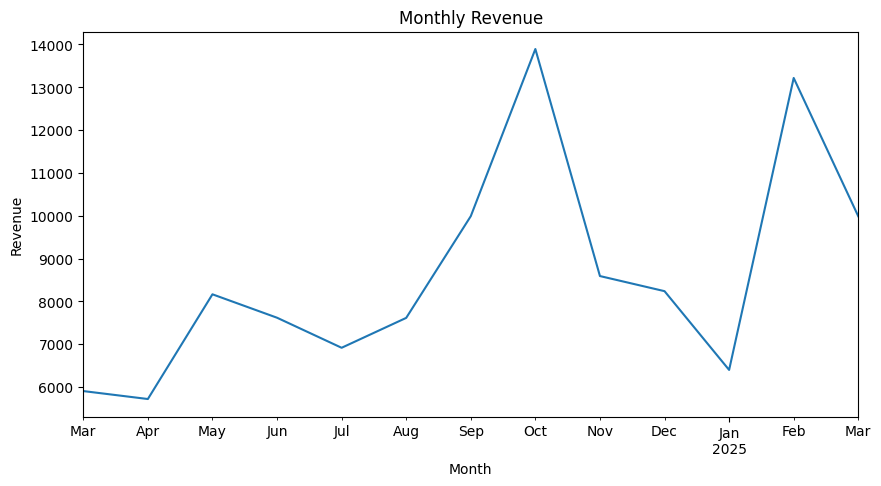

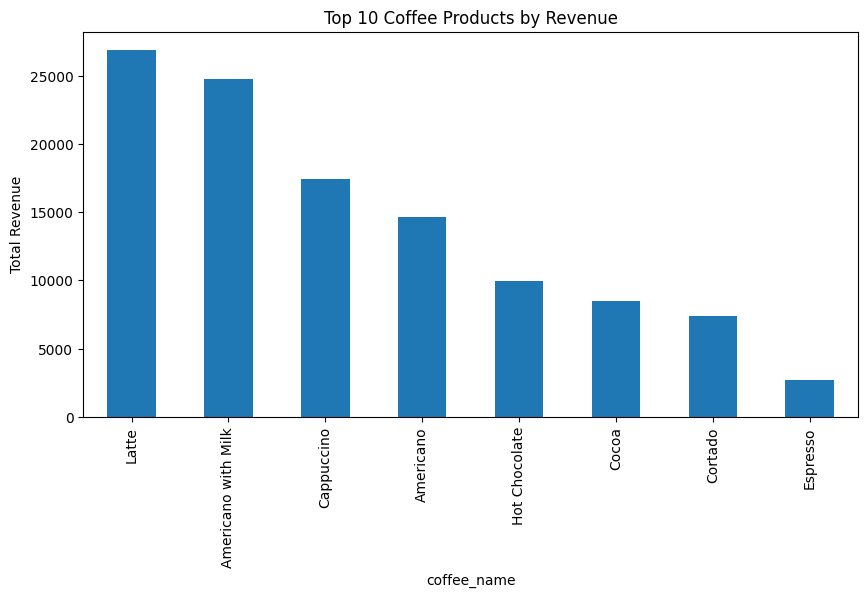

Top 5 Coffee Products by Total Revenue:
coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Name: Revenue, dtype: float64

Top 5 Months for Revenue:
date
2024-10    13891.16
2025-02    13215.48
2024-09     9988.64
2025-03     9986.44
2024-11     8590.54
Freq: M, Name: Revenue, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Coffee Sales Data.csv')
df.columns = df.columns.str.strip()
df.dropna(inplace=True)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'money': 'Revenue'}, inplace=True)
if 'date' in df.columns:
    sales_over_time = df.groupby(df['date'].dt.to_period('M')).sum(numeric_only=True)
    sales_over_time['Revenue'].plot(kind='line', figsize=(10,5), title='Monthly Revenue')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()
top_products = df.groupby('coffee_name')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Coffee Products by Revenue')
plt.ylabel('Total Revenue')
plt.show()

print("Top 5 Coffee Products by Total Revenue:")
print(df.groupby('coffee_name')['Revenue'].sum().sort_values(ascending=False).head())

print("\nTop 5 Months for Revenue:")
print(sales_over_time['Revenue'].sort_values(ascending=False).head())
